In [1]:
# to disable warning outputs
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
import tensorflow as tf
import sys
import warnings
import math
%matplotlib inline
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import json
def sigmoid(x):
  return 1 / (1 + math. exp(-x))
print(sigmoid(0.5))

0.6224593312018546


In [2]:

from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [3]:

from google.colab import drive
drive.mount('/content/drive')
fname = "teleCust1000t.csv"
d1 = pd.read_csv(join(path_prefix, fname))
d1.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


In [4]:
d1.isna().sum()


region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

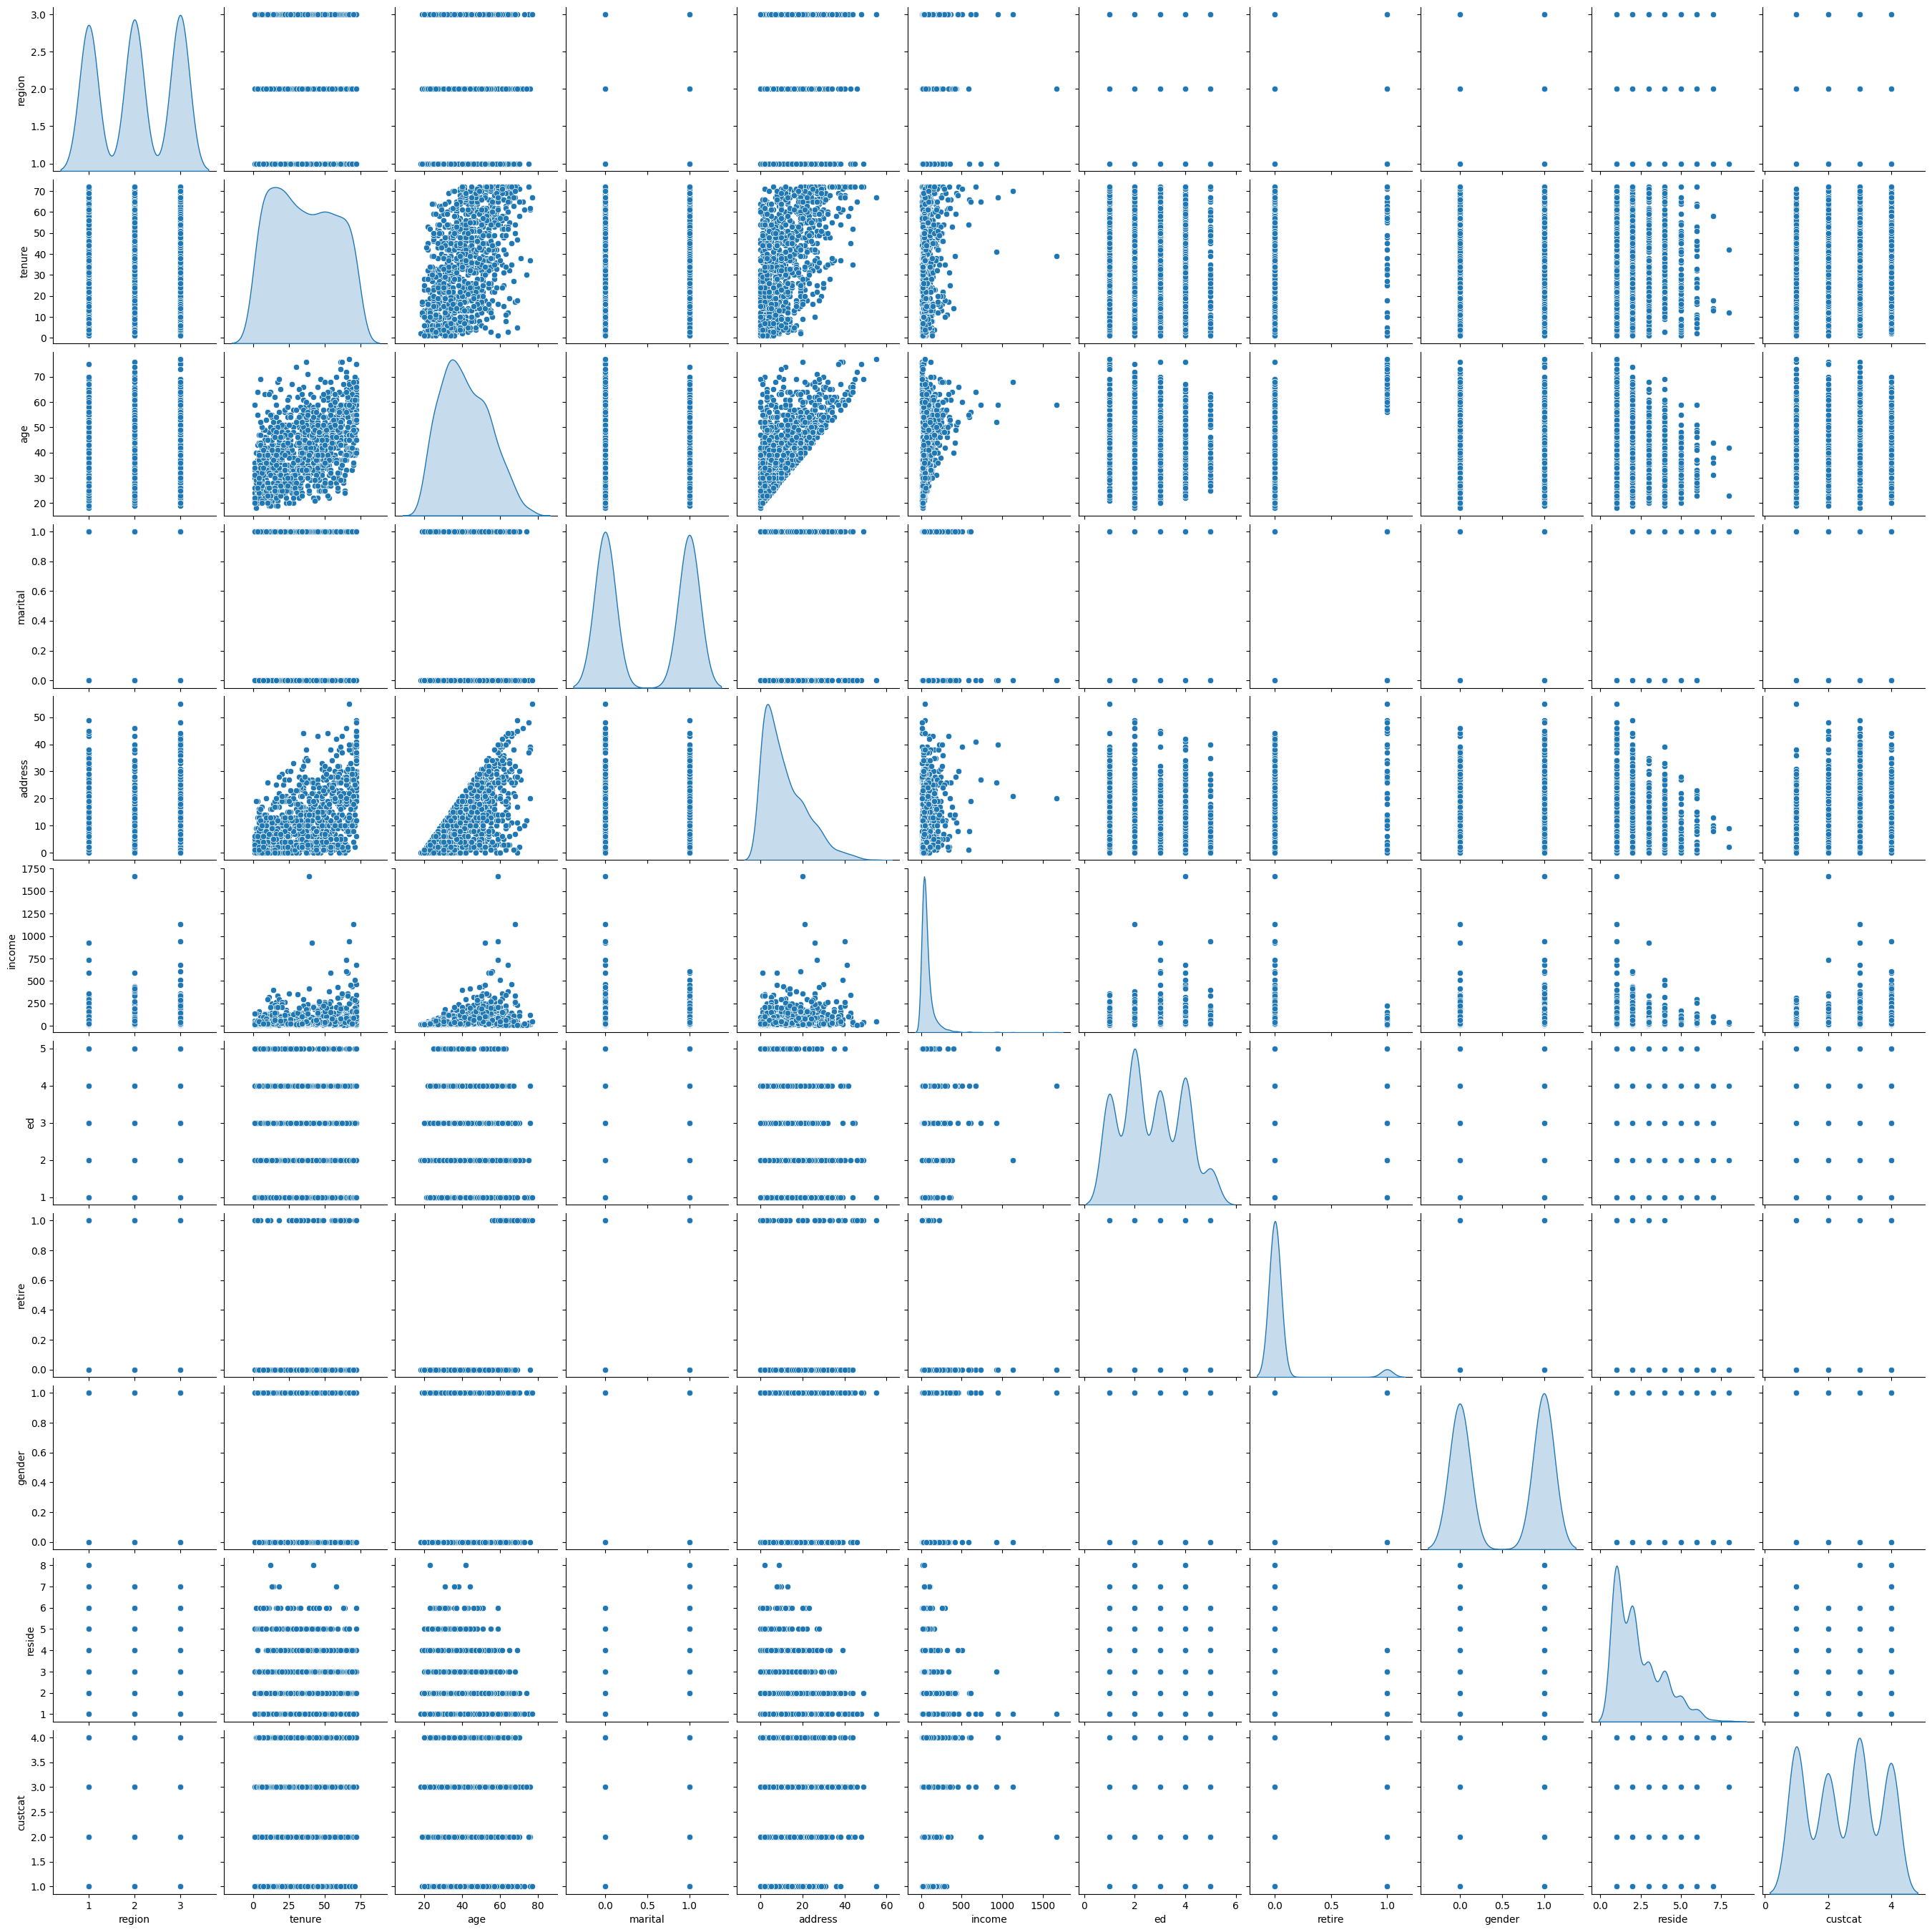

In [5]:
sns.pairplot(d1[['region', 'tenure','age','marital','address','income','ed','retire','gender','reside','custcat']], diag_kind='kde')

# After getting to know the dataset we then use regression techniques to find a collective releationship between the data sets

my model would need to calculate the estimated tensure or the time that a user still has an account with siad technology company given his income,gender,ed(education) ,adress and martial status.


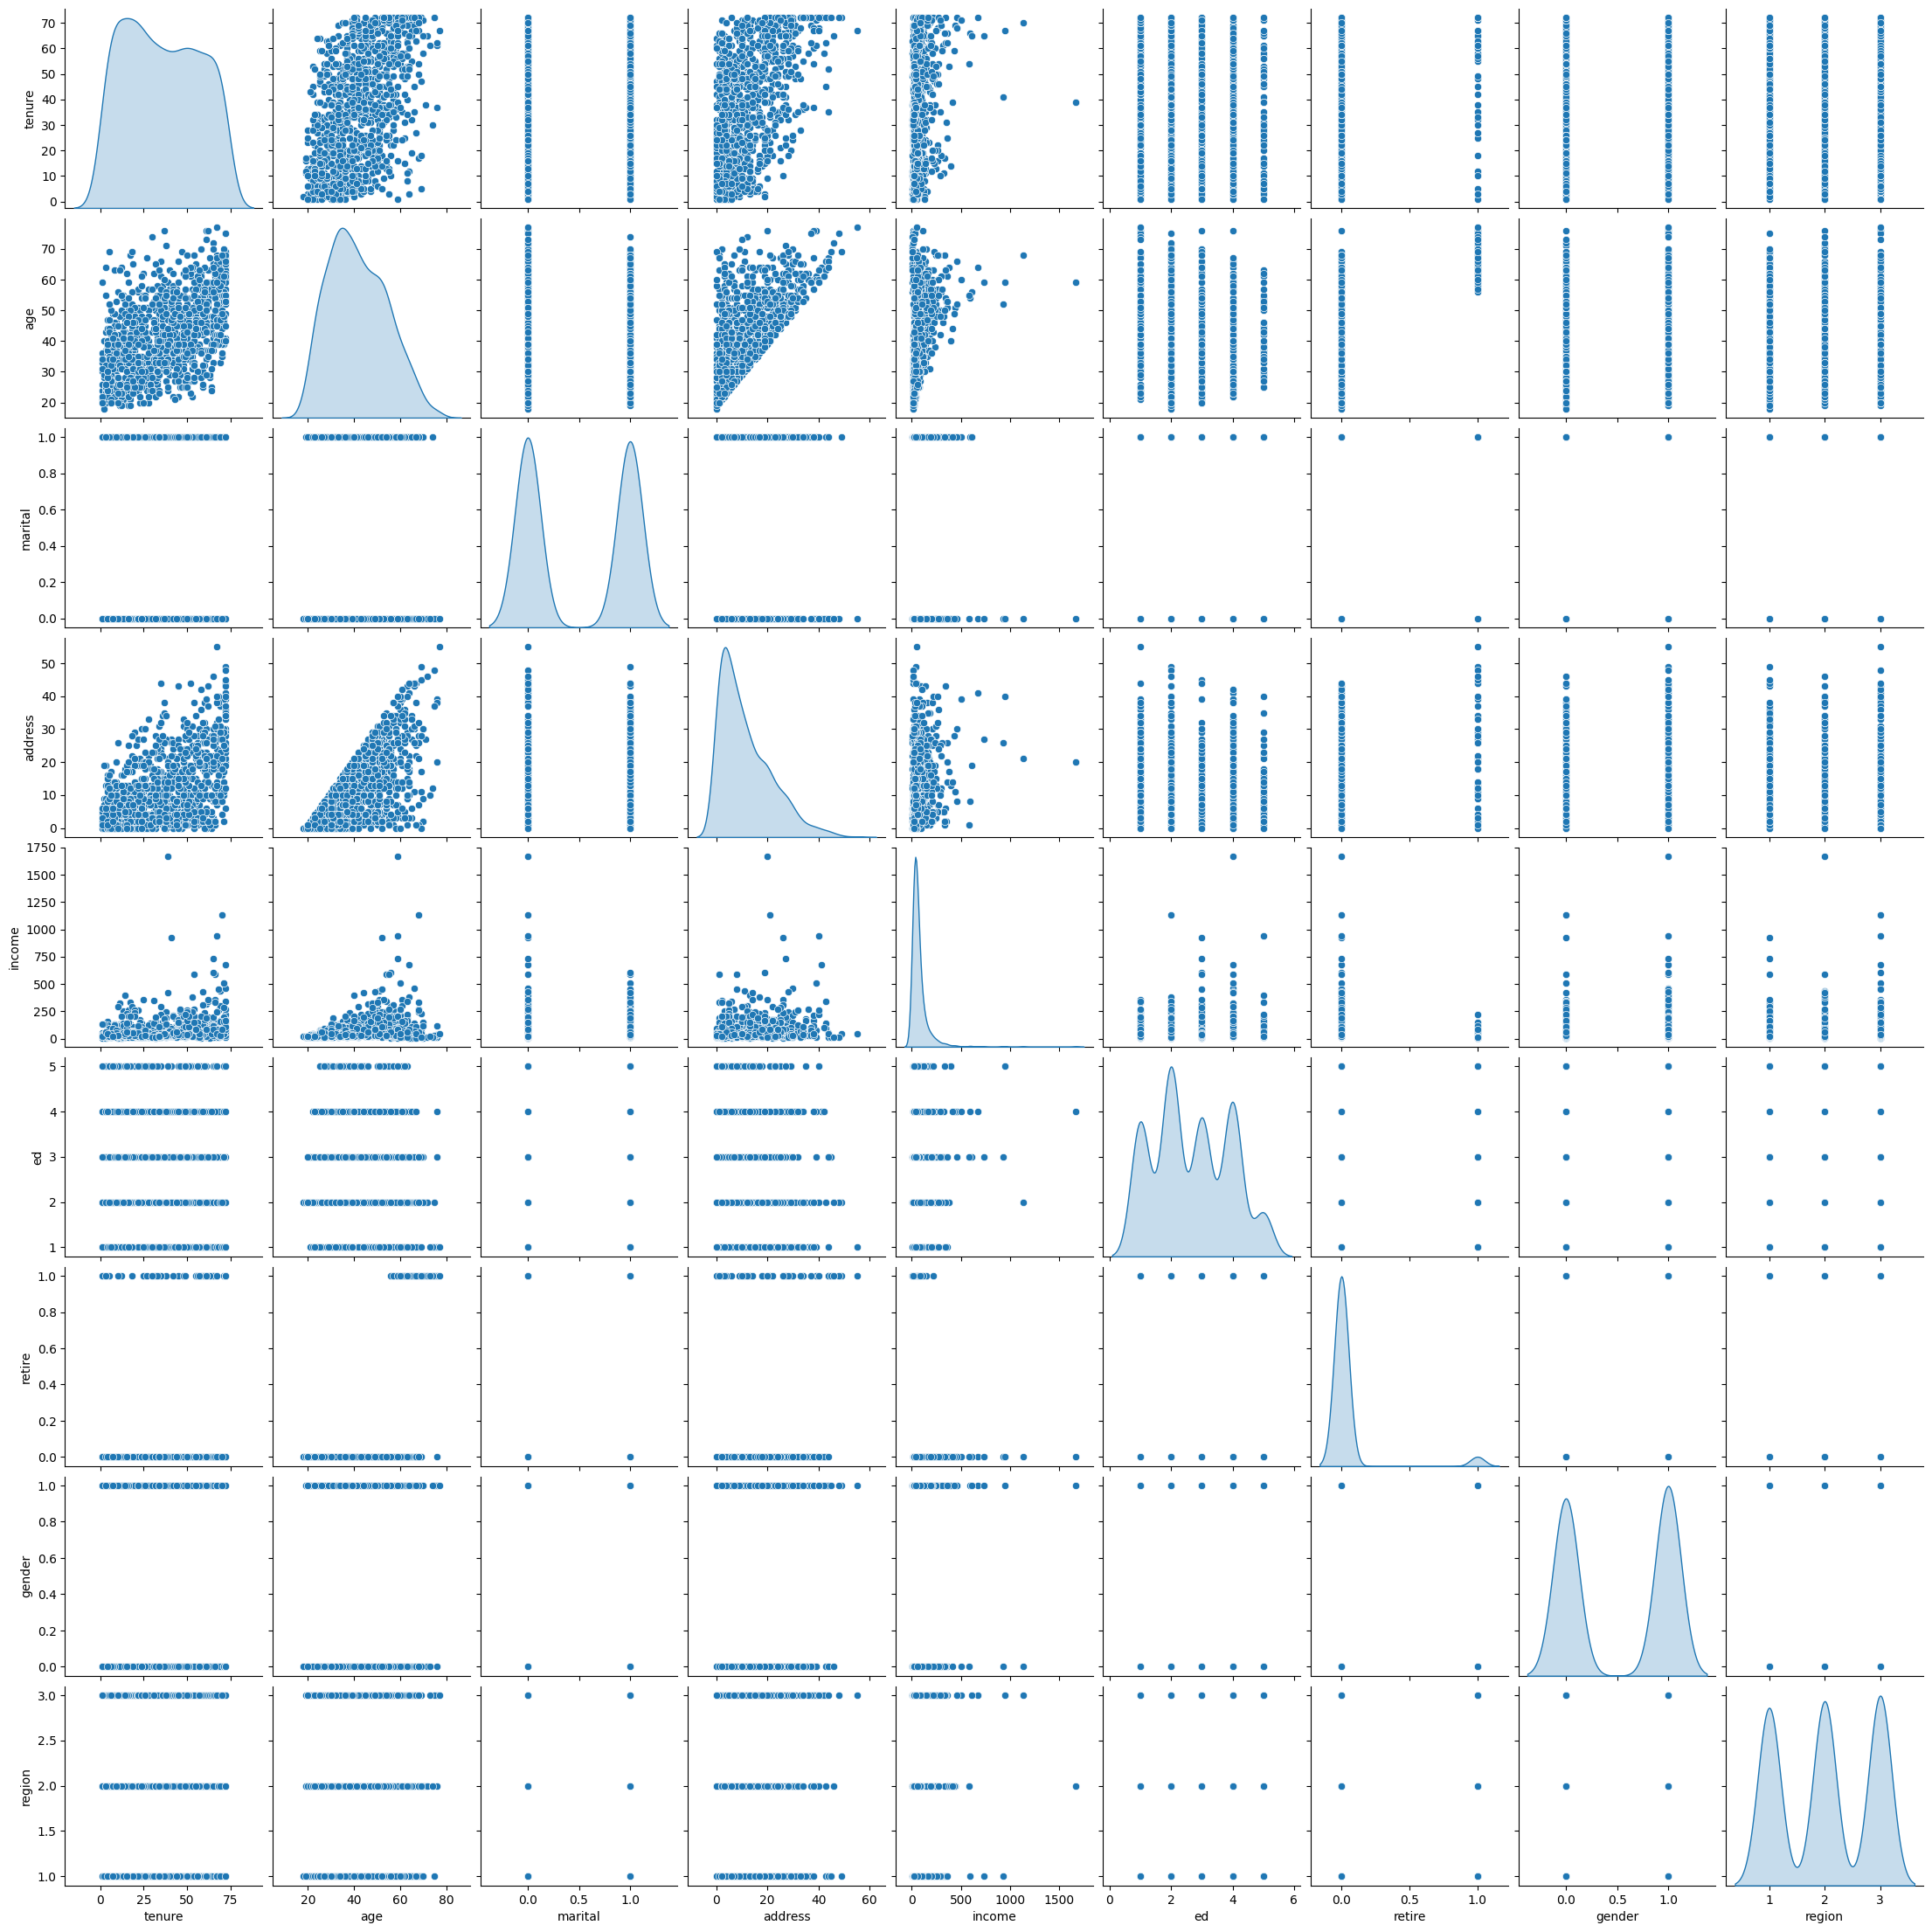

In [6]:
sns.pairplot(d1[[ 'tenure','age','marital','address','income','ed','retire','gender','region',]], diag_kind='kde')

Our inistial analysis: 


1.   we have 3 regions (region 1,2 and 3)
2.   we have 2 genders (0,1) male and female

3. levels of education from 1 to 5 or from no high school to Phd holder
4. two values for retiring 0,1
5. tensure is maxed around 75 in months

this data is mixed between continous and discrete data but the Y value is continous so we can relay on continous regression techniques







In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming you have a DataFrame 'df' with columns 'x1', 'x2', 'x3' and target variable 'y'
X = d1[['age','marital','address','income','ed','retire','gender','region']].values  # Independent variables
y = d1['tenure'].values  # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the parameters
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Build the equation
equation = f"y = {intercept}"
for i, coefficient in enumerate(coefficients):
    equation += f" + ({coefficient} * x{i+1})"
print("Equation:", equation)

# Predict using the trained model
predictions = model.predict(X)

# Calculate the mean absolute error
mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error:", mae)


Coefficients: [ 0.389119    7.09679531  0.74123874  0.01960686 -0.72720516 -1.42464351
  0.77757564  0.44880221]
Intercept: 6.410621802952839
Equation: y = 6.410621802952839 + (0.38911899536522704 * x1) + (7.096795307389501 * x2) + (0.7412387376244018 * x3) + (0.019606864142545533 * x4) + (-0.7272051575826564 * x5) + (-1.424643510800107 * x6) + (0.7775756447644602 * x7) + (0.4488022057671384 * x8)
Mean Absolute Error: 14.421315664078495


In [30]:
# Column names
column_names = ['age', 'marital', 'address', 'income', 'ed', 'retire', 'gender', 'region']

# Coefficients and intercept
coefficients = [0.389119, 7.09679531, 0.74123874, 0.01960686, -0.72720516, -1.42464351, 0.77757564, 0.44880221]
intercept = 6.410621802952839

# Regression model equation
equation = f"tenure = {intercept} + "
for i, coefficient in enumerate(coefficients):
    equation += f"({coefficient} * {column_names[i]}) + "

# Remove the extra '+' at the end of the equation
equation = equation[:-3]

# Print the equation
print(equation)

tenure = 6.410621802952839 + (0.389119 * age) + (7.09679531 * marital) + (0.74123874 * address) + (0.01960686 * income) + (-0.72720516 * ed) + (-1.42464351 * retire) + (0.77757564 * gender) + (0.44880221 * region)


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Assuming you have a DataFrame 'd1' with columns 'age', 'marital', 'address', 'income', 'ed', 'retire', 'gender', and 'region'
X = d1[['age', 'marital', 'address', 'income', 'ed', 'retire', 'gender', 'region']].values  # Independent variables
y = d1['tenure'].values  # Dependent variable



# Create and fit the power regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the parameters
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Build the equation
equation = f"y = {intercept}"
for i, coefficient in enumerate(coefficients):
    equation += f" + ({coefficient} * x^{i+1})"
print("Equation:", equation)

# Calculate the MAE
predictions = model.predict(X)
mae = mean_absolute_error(y, predictions)
print("MAE:", mae)

Coefficients: [ 0.389119    7.09679531  0.74123874  0.01960686 -0.72720516 -1.42464351
  0.77757564  0.44880221]
Intercept: 6.410621802952839
Equation: y = 6.410621802952839 + (0.38911899536522704 * x^1) + (7.096795307389501 * x^2) + (0.7412387376244018 * x^3) + (0.019606864142545533 * x^4) + (-0.7272051575826564 * x^5) + (-1.424643510800107 * x^6) + (0.7775756447644602 * x^7) + (0.4488022057671384 * x^8)
MAE: 14.421315664078495


#to be continued...
